Streamfunction - Vorticity formulation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Geometry and fluid properties

In [2]:
kv = 1		#kinematic viscosity
U = 1		#top wall velocity = 1m/s
nx = 15		#number of elements along y
ny = 15 	#number of elements along x
del_x = 1	#element size in x. 
del_y = 1	#element size in y. 
del_t = 0.125   #decided from stability condition required in FTCS scheme
t = 400 

Boundary Conditions

In [3]:
u = np.zeros((ny+1,nx+1))		#initializing u velocity
u[0,:] = 1				#top wall velocity
u_f = np.copy(u)

v = np.zeros((ny+1,nx+1))		#initializing v velocity
v_f = np.copy(v)

#boundary conditions for streamfunction doesnot change as it depends on absolute values of velocity at walls which in any case remains zero. 
#Boundary conditions of vorticity will change with each iteration as it depends on velocity gradient in direction perpendicular to wall, which in turn changes as velocity is "transported" from top wall.

psi = np.zeros((nx+1,ny+1))		#initializing streamfunction
psi_f = np.copy(psi)

om = np.zeros((nx+1,ny+1))		#initializing vorticity
om_f = np.copy(om)

Governing Equations

In [4]:
#boundary conditions for vorticity

for i in range(1,t):								#convergence criteria

	om[ny,:] = (2/del_y ** 2)*psi_f[ny-1,:]					#bottom wall
	om[:,0] = (2/del_x ** 2)*psi_f[:,1] 					#left wall
	om[:,nx] = (2/del_x ** 2)*psi_f[:,nx-1]					#right wall 
	om[0,:] = (2/del_y ** 2)*psi_f[1,:] - (2*U/del_y)			#top wall

#solving for vorticity

	om[1:-1,1:-1] = (((1/del_t)-(2*kv/(del_x**2))-(2*kv/(del_y**2)))*om_f[1:-1,1:-1] + ((-u[1:-1,1:-1]/(2*del_x))+(kv/(del_x**2)))*om_f[1:-1,2:] + ((u[1:-1,1:-1]/(2*del_x))+(kv/(del_x**2)))*om_f[1:-1,0:-2] + ((v[1:-1,1:-1]/(2*del_y))+(kv/(del_y**2)))*om_f[2:,1:-1] + ((-v[1:-1,1:-1]/(2*del_y))+(kv/(del_y**2)))*om_f[0:-2,1:-1]) * del_t

#solving for streamfunction

	psi[1:-1,1:-1] = (((psi_f[1:-1,2:] + psi_f[1:-1,0:-2])/(del_x ** 2)) + ((psi_f[2:,1:-1] + psi_f[0:-2,1:-1])/(del_y ** 2)) - om[1:-1,1:-1]) / ((2/(del_x**2)) + (2/(del_y**2)))
	
#getting velocity componentts

	u[1:-1,1:-1] = (psi[2:,1:-1] - psi[0:-2,1:-1])/(2*del_x) 
	v[1:-1,1:-1] = (psi[1:-1,2:] - psi[1:-1,0:-2])/(2*del_y)  		
	
#updating flag matrix for next iteration and printing results

	om_f = np.copy(om)
	psi_f = np.copy(psi)
	v_f = np.copy(v)
	u_f = np.copy(u) 
	
	i = i + 1



Post Processing

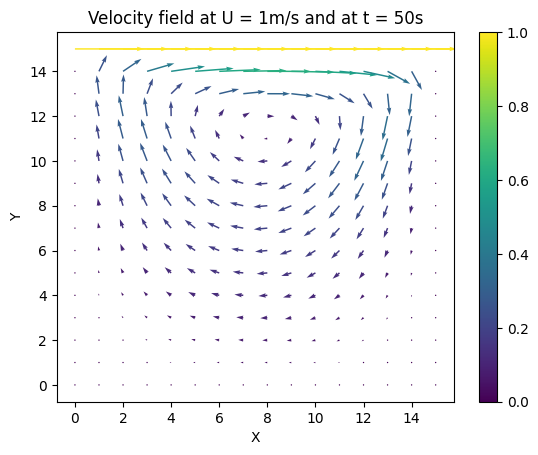

In [5]:
(x,y) = np.meshgrid(np.arange(len(u)), np.arange(len(v)))

u = np.flipud(u)						#to visualize results correctly
v = np.flipud(v)						#to visualize results correctly
color = (u ** 2 + v ** 2)**(0.5)        #to visualize magnitude of the local velocity
plt.figure()
plt.quiver(x,y,u,v, color)
plt.colorbar()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Velocity field at U = 1m/s and at t = 50s")
#plt.streamplot(x,y,u,v)
plt.show() 